# Project 2:Wrangling and Exploratory Data Analysis
Yosefe Eshete 04/03/20


In [2]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

import sqlite3

con = sqlite3.connect('lahman2016.sqlite')

## Wrangling 

Problem 1: Payroll and Winning Percentage  

In [3]:
query = """
SELECT h.yearId, h.teamId, 100.0 * (1.0 * h.W/h.G) AS winPercentage, SUM(s.salary) as payroll
FROM TEAMS AS h JOIN SALARIES AS s on h.teamId == s.teamId and h.yearId == s.yearId
WHERE h.yearId >= 1990 and h.yearId <= 2014
GROUP BY h.teamId, h.yearId
ORDER BY winPercentage DESC, payroll DESC
"""

payWin = pd.read_sql_query(query, con)
payWin.head(10)

,yearID,teamID,winPercentage,payroll
0,2001,SEA,71.604938,74720834.0
1,1998,NYA,70.370370,66806867.0
2,1995,CLE,69.444444,37937835.0
3,1998,ATL,65.432099,61186000.0
4,1994,MON,64.912281,19098000.0
5,2004,SLN,64.814815,83228333.0
6,1993,ATL,64.197531,41641417.0
7,2002,NYA,63.975155,125928583.0
8,2009,NYA,63.580247,201449189.0
9,1999,ATL,63.580247,73140000.0


## Exploratory Data Analysis

### Payroll Distribution

Problem 2: Plot the distribution of payrolls across teams conditioned on year (from 1990-2014)


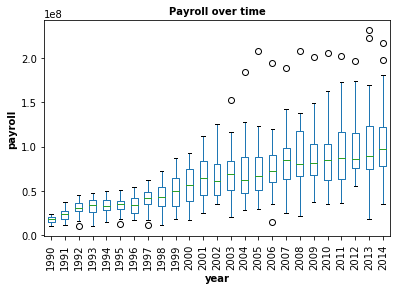

In [4]:
trnd = payWin.boxplot(by = 'yearID', column = ['payroll'], grid = False)
plt.xticks(rotation=90)
plt.ylabel('payroll',fontsize=10, fontweight='bold')
plt.xlabel('year', fontsize=10, fontweight='bold')
plt.title('Payroll over time', fontsize=10, fontweight='bold')
plt.suptitle('')

Question 1: As seen from the graph above there seems to be more money in baseball, but the median amount spent seems to stay relatively constant from 2003-2014. There seems to be an increase in outliers or teams that are willing to spend more then any other team. Most teams are spending money within a range that is constant over time from 2003-2014.

Problem 3: Let's see if the central tendency in terms of the mean represents this leveling(decrease in rate of spending) from 1990-2003 compared to 2003-2014.  


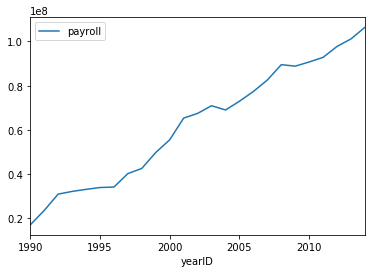

In [7]:
avgPayWinYear = payWin.groupby(['yearID']).mean()
avgPayWinYear.plot(y='payroll')


In [8]:
#payWin['yearBins'] = pd.cut(x=payWin['yearID'], bins=5)
#avgWinYear['winBins'] = pd.cut(x=avgWinYear['yearID'], bins=5



Question 2: 

Problem 5: 